In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

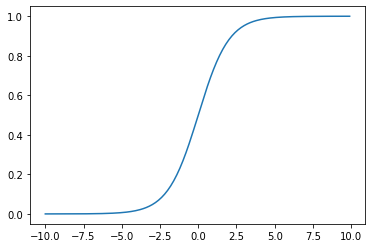

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
plt.plot(x, y)

In [3]:
data = datasets.load_iris()
df = pd.DataFrame(data["data"], columns=data["feature_names"]).drop(columns=["petal length (cm)"])
df.insert(2, "const", 1)
df["variety"] = data["target_names"][data["target"]]
df.insert(4, "setosa", df["variety"] == "setosa")

In [4]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
train, test = train_test_split(df, test_size=10, random_state=5)
test.head()

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety
82,5.8,2.7,1,1.2,False,versicolor
134,6.1,2.6,1,1.4,False,virginica
114,5.8,2.8,1,2.4,False,virginica
42,4.4,3.2,1,0.2,True,setosa
109,7.2,3.6,1,2.5,False,virginica


## Overview

1. regression for petal width
2. binary classification for setosa: T/F
3. binary classification for setosa: prob(T)
4. multi-class classification for variety

In [5]:
# model 1: features => petal width
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
reg = LinearRegression(fit_intercept=False)
reg.fit(train[xcols], train["petal width (cm)"])
print(reg.score(test[xcols], test["petal width (cm)"]))
test["predict"] = reg.predict(test[xcols])
test

0.5805709195672956


,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,predict
82,5.8,2.7,1,1.2,False,versicolor,1.327769
134,6.1,2.6,1,1.4,False,virginica,1.590835
114,5.8,2.8,1,2.4,False,virginica,1.279061
42,4.4,3.2,1,0.2,True,setosa,0.083889
109,7.2,3.6,1,2.5,False,virginica,1.889735
57,4.9,2.4,1,1.0,False,versicolor,0.830818
1,4.9,3.0,1,0.2,True,setosa,0.538569
70,5.9,3.2,1,1.8,False,versicolor,1.155681
25,5.0,3.0,1,0.2,True,setosa,0.610022
84,5.4,3.0,1,1.5,False,versicolor,0.895833


In [6]:
# model 2: features => setosa (is it one?)
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
cls = LogisticRegression(fit_intercept=False)
cls.fit(train[xcols], train["setosa"])
print(cls.score(test[xcols], test["setosa"])) # accuracy (what % did we get right?)
test["predict"] = cls.predict(test[xcols])
test

1.0


,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,predict
82,5.8,2.7,1,1.2,False,versicolor,False
134,6.1,2.6,1,1.4,False,virginica,False
114,5.8,2.8,1,2.4,False,virginica,False
42,4.4,3.2,1,0.2,True,setosa,True
109,7.2,3.6,1,2.5,False,virginica,False
57,4.9,2.4,1,1.0,False,versicolor,False
1,4.9,3.0,1,0.2,True,setosa,True
70,5.9,3.2,1,1.8,False,versicolor,False
25,5.0,3.0,1,0.2,True,setosa,True
84,5.4,3.0,1,1.5,False,versicolor,False


In [7]:
# [[False Prob, True Prob],
#  [False Prob, True Prob],
#  ...]
test["setosa_prob"] = cls.predict_proba(test[xcols])[:, 1]
cls.predict_proba(test[xcols])

array([[0.9405628 , 0.0594372 ],
       [0.97972503, 0.02027497],
       [0.91463241, 0.08536759],
       [0.07056997, 0.92943003],
       [0.93345725, 0.06654275],
       [0.85227945, 0.14772055],
       [0.35722665, 0.64277335],
       [0.74147607, 0.25852393],
       [0.41451931, 0.58548069],
       [0.65092753, 0.34907247]])

In [8]:
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,predict,setosa_prob
82,5.8,2.7,1,1.2,False,versicolor,False,0.059437
134,6.1,2.6,1,1.4,False,virginica,False,0.020275
114,5.8,2.8,1,2.4,False,virginica,False,0.085368
42,4.4,3.2,1,0.2,True,setosa,True,0.929430
109,7.2,3.6,1,2.5,False,virginica,False,0.066543
57,4.9,2.4,1,1.0,False,versicolor,False,0.147721
1,4.9,3.0,1,0.2,True,setosa,True,0.642773
70,5.9,3.2,1,1.8,False,versicolor,False,0.258524
25,5.0,3.0,1,0.2,True,setosa,True,0.585481
84,5.4,3.0,1,1.5,False,versicolor,False,0.349072


In [9]:
# model 3: features => variety
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
mult = LogisticRegression(fit_intercept=False)
mult.fit(train[xcols], train["variety"])
print(mult.score(test[xcols], test["variety"]))
test["predict"] = mult.predict(test[xcols])
test

0.9


,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,predict,setosa_prob
82,5.8,2.7,1,1.2,False,versicolor,versicolor,0.059437
134,6.1,2.6,1,1.4,False,virginica,virginica,0.020275
114,5.8,2.8,1,2.4,False,virginica,versicolor,0.085368
42,4.4,3.2,1,0.2,True,setosa,setosa,0.929430
109,7.2,3.6,1,2.5,False,virginica,virginica,0.066543
57,4.9,2.4,1,1.0,False,versicolor,versicolor,0.147721
1,4.9,3.0,1,0.2,True,setosa,setosa,0.642773
70,5.9,3.2,1,1.8,False,versicolor,versicolor,0.258524
25,5.0,3.0,1,0.2,True,setosa,setosa,0.585481
84,5.4,3.0,1,1.5,False,versicolor,versicolor,0.349072


In [10]:
reg, cls, mult

(LinearRegression(fit_intercept=False),
 LogisticRegression(fit_intercept=False),
 LogisticRegression(fit_intercept=False))

In [11]:
print(reg.coef_)
print()
print(cls.coef_)
print()
print(mult.coef_)

[ 0.71452794 -0.48708032 -1.5013766 ]

[[-2.42108094  3.90002306  0.75064911]]

[[-1.80097204  3.01989635  0.69404974]
 [ 0.64875706 -1.46308696  1.04354373]
 [ 1.15221498 -1.55680939 -1.73759347]]


In [12]:
X = test[xcols].values

In [13]:
# reg.predict
X @ reg.coef_.reshape(-1,1)

array([[1.32776857],
       [1.59083498],
       [1.27906054],
       [0.0838893 ],
       [1.8897354 ],
       [0.83081752],
       [0.53856933],
       [1.15568121],
       [0.61002213],
       [0.8958333 ]])

In [14]:
# cls.predict
X @ cls.coef_.reshape(-1,1) > 0

array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False]])

In [15]:
# cls.predict_proba
sigmoid(X @ cls.coef_.reshape(-1,1))

array([[0.0594372 ],
       [0.02027497],
       [0.08536759],
       [0.92943003],
       [0.06654275],
       [0.14772055],
       [0.64277335],
       [0.25852393],
       [0.58548069],
       [0.34907247]])

In [16]:
# mult.predict

In [17]:
# each column corresponds to a iris variety
# the column has coefficients to multiply X and score how much it is like that variety
mult.coef_.T

array([[-1.80097204,  0.64875706,  1.15221498],
       [ 3.01989635, -1.46308696, -1.55680939],
       [ 0.69404974,  1.04354373, -1.73759347]])

In [18]:
X @ mult.coef_.T[:, 0:1]

array([[-1.59786793],
       [-2.44014918],
       [-1.2958783 ],
       [ 2.43344109],
       [-1.40132207],
       [-0.88296201],
       [ 0.9289758 ],
       [-0.26801696],
       [ 0.7488786 ],
       [ 0.02848978]])

In [19]:
X @ mult.coef_.T[:, 1:2]

array([[ 0.85599987],
       [ 1.19693568],
       [ 0.70969118],
       [-0.78380349],
       [ 0.44748149],
       [ 0.71104461],
       [-0.16680757],
       [ 0.1893321 ],
       [-0.10193186],
       [ 0.15757096]])

In [20]:
# row vector dot coef vector (but nested loop over every row and every set of coef)
X @ mult.coef_.T

array([[-1.59786793,  0.85599987,  0.74186806],
       [-2.44014918,  1.19693568,  1.24321349],
       [-1.2958783 ,  0.70969118,  0.58618712],
       [ 2.43344109, -0.78380349, -1.6496376 ],
       [-1.40132207,  0.44748149,  0.95384058],
       [-0.88296201,  0.71104461,  0.1719174 ],
       [ 0.9289758 , -0.16680757, -0.76216824],
       [-0.26801696,  0.1893321 ,  0.07868487],
       [ 0.7488786 , -0.10193186, -0.64694674],
       [ 0.02848978,  0.15757096, -0.18606075]])

In [21]:
(X @ mult.coef_.T).max() # biggest score anywhere

2.4334410884892166

In [22]:
(X @ mult.coef_.T).max(axis=1) # biggest score of each row

array([0.85599987, 1.24321349, 0.70969118, 2.43344109, 0.95384058,
       0.71104461, 0.9289758 , 0.1893321 , 0.7488786 , 0.15757096])

In [23]:
(X @ mult.coef_.T).argmax(axis=1) # index of biggest score of each row

array([1, 2, 1, 0, 2, 1, 0, 1, 0, 1])

In [24]:
print(mult.classes_)
mult.classes_[[0,0,0,1,2,2]]

['setosa' 'versicolor' 'virginica']


array(['setosa', 'setosa', 'setosa', 'versicolor', 'virginica',
       'virginica'], dtype=object)

In [26]:
# mult.predict(X)
mult.classes_[(X @ mult.coef_.T).argmax(axis=1)]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)

In [27]:
X

array([[5.8, 2.7, 1. ],
       [6.1, 2.6, 1. ],
       [5.8, 2.8, 1. ],
       [4.4, 3.2, 1. ],
       [7.2, 3.6, 1. ],
       [4.9, 2.4, 1. ],
       [4.9, 3. , 1. ],
       [5.9, 3.2, 1. ],
       [5. , 3. , 1. ],
       [5.4, 3. , 1. ]])

In [28]:
mult.coef_.T

array([[-1.80097204,  0.64875706,  1.15221498],
       [ 3.01989635, -1.46308696, -1.55680939],
       [ 0.69404974,  1.04354373, -1.73759347]])

In [29]:
X @ mult.coef_.T

array([[-1.59786793,  0.85599987,  0.74186806],
       [-2.44014918,  1.19693568,  1.24321349],
       [-1.2958783 ,  0.70969118,  0.58618712],
       [ 2.43344109, -0.78380349, -1.6496376 ],
       [-1.40132207,  0.44748149,  0.95384058],
       [-0.88296201,  0.71104461,  0.1719174 ],
       [ 0.9289758 , -0.16680757, -0.76216824],
       [-0.26801696,  0.1893321 ,  0.07868487],
       [ 0.7488786 , -0.10193186, -0.64694674],
       [ 0.02848978,  0.15757096, -0.18606075]])

In [31]:
(X @ mult.coef_.T).argmax(axis=1)

array([1, 2, 1, 0, 2, 1, 0, 1, 0, 1])

In [35]:
mult.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [38]:
mult.classes_[(X @ mult.coef_.T).argmax(axis=1)]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)

# Visualize Decision Boundaries

In [ ]:
import numpy as np # np.meshgrid
import matplotlib.pyplot as plt # plt.contourf

In [40]:
X, Y = np.meshgrid(np.arange(10), np.arange(10))
print(X)
print()
print(Y)

[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]

[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8 8]
 [9 9 9 9 9 9 9 9 9 9]]


In [44]:
Z = X * Y
Z

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

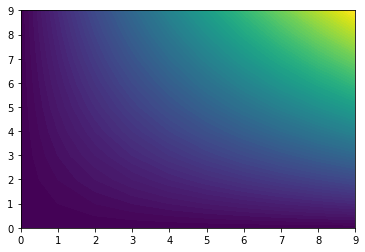

In [48]:
plt.contourf(X, Y, Z, levels=100)

In [51]:
cls.feature_names_in_

array(['sepal length (cm)', 'sepal width (cm)', 'const'], dtype=object)

In [53]:
X.shape

(10, 10)

In [61]:
X, Y = np.meshgrid(np.arange(0,10,0.1), np.arange(0,10,0.1))

predict_df = pd.DataFrame({
    'sepal length (cm)': X.reshape(-1),
    'sepal width (cm)': Y.reshape(-1),
    'const': 1
})
predict_df["prediction"] = cls.predict(predict_df)
predict_df.head()
Z = predict_df["prediction"].values
Z

array([ True,  True,  True, ...,  True,  True,  True])

In [72]:
# plt.gca() # get current axes

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

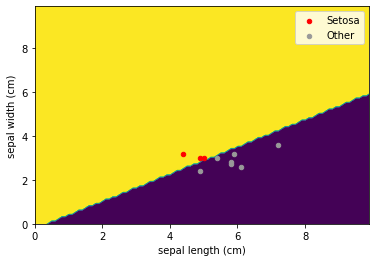

In [82]:
plt.contourf(X, Y, Z.reshape(X.shape), levels=100)

setosa = test[test["setosa"]]
other = test[~test["setosa"]]

setosa.plot.scatter(x="sepal length (cm)", y="sepal width (cm)",
                    ax=plt.gca(), color="r", label="Setosa")
other.plot.scatter(x="sepal length (cm)", y="sepal width (cm)",
                   ax=plt.gca(), color="0.6", label="Other")

In [80]:
predict_df

,sepal length (cm),sepal width (cm),const,prediction
0,0.0,0.0,1,True
1,0.1,0.0,1,True
2,0.2,0.0,1,True
3,0.3,0.0,1,True
4,0.4,0.0,1,False
...,...,...,...,...
9995,9.5,9.9,1,True
9996,9.6,9.9,1,True
9997,9.7,9.9,1,True
9998,9.8,9.9,1,True


### 3 categories

In [134]:
X, Y = np.meshgrid(np.arange(0,10,0.1), np.arange(0,10,0.1))

predict_df = pd.DataFrame({
    'sepal length (cm)': X.reshape(-1),
    'sepal width (cm)': Y.reshape(-1),
    'const': 1
})
predict_df["prediction"] = mult.predict(predict_df)
predict_df.head()
Z = predict_df["prediction"].values
Z

array(['versicolor', 'versicolor', 'versicolor', ..., 'setosa', 'setosa',
       'setosa'], dtype=object)

In [135]:
# convert strings to numbers so Z is numeric
Z

array(['versicolor', 'versicolor', 'versicolor', ..., 'setosa', 'setosa',
       'setosa'], dtype=object)

In [136]:
classes = list(mult.classes_)
classes.index("versicolor")

1

In [137]:
Z = np.array([classes.index(z) for z in Z])
Z

array([1, 1, 1, ..., 0, 0, 0])

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

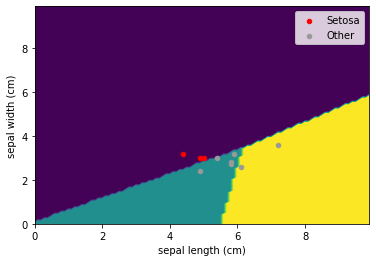

In [96]:
plt.contourf(X, Y, Z.reshape(X.shape), levels=100)

setosa = test[test["setosa"]]
other = test[~test["setosa"]]

setosa.plot.scatter(x="sepal length (cm)", y="sepal width (cm)",
                    ax=plt.gca(), color="r", label="Setosa")
other.plot.scatter(x="sepal length (cm)", y="sepal width (cm)",
                   ax=plt.gca(), color="0.6", label="Other")
# TODO: draw the 3 different scatters as different colors

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [113]:
pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lr", LogisticRegression(max_iter=500))
])
pipe.fit(train[xcols], train["variety"])

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('lr', LogisticRegression(max_iter=500))])

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

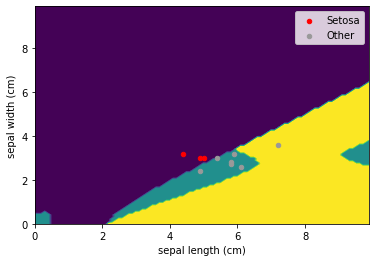

In [109]:
X, Y = np.meshgrid(np.arange(0,10,0.1), np.arange(0,10,0.1))

predict_df = pd.DataFrame({
    'sepal length (cm)': X.reshape(-1),
    'sepal width (cm)': Y.reshape(-1),
    'const': 1
})
predict_df["prediction"] = pipe.predict(predict_df)
predict_df.head()
Z = predict_df["prediction"].values
Z = np.array([classes.index(z) for z in Z])
Z

plt.contourf(X, Y, Z.reshape(X.shape), levels=100)

setosa = test[test["setosa"]]
other = test[~test["setosa"]]

setosa.plot.scatter(x="sepal length (cm)", y="sepal width (cm)",
                    ax=plt.gca(), color="r", label="Setosa")
other.plot.scatter(x="sepal length (cm)", y="sepal width (cm)",
                   ax=plt.gca(), color="0.6", label="Other")
# TODO: draw the 3 different scatters as different colors

# Where are coef coming from for LogisticRegression

In [116]:
# Finding Coef:

# choose random random coefficients
# LOOP
#    1. tweak the coefficients, trying to make them slightly better
#    2. if we're not making improvements, break out the loop

In [117]:
# LogisticRegression wants features that are:
# 1. "smallish"
# 2. values that are "centered" (the average of each feature column is zero)

# making the data as above is called "standardization"

In [122]:
x = np.array([1,2,8,9])
x = (x - x.mean()) / x.std()
x

array([-1.13137085, -0.84852814,  0.84852814,  1.13137085])

In [125]:
from sklearn.preprocessing import StandardScaler
StandardScaler().fit_transform(x.reshape(-1, 1))

array([[-1.13137085],
       [-0.84852814],
       [ 0.84852814],
       [ 1.13137085]])

In [133]:
# ADVICE 1: always use StandardScaler with LogisticRegression
# ADVICE 2: always use poly before std if you're doing both
pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std", StandardScaler()),
    ("lr", LogisticRegression(max_iter=100))
])
pipe.fit(train[xcols], train["variety"])

Pipeline(steps=[('poly', PolynomialFeatures()), ('std', StandardScaler()),
                ('lr', LogisticRegression())])

In [132]:
x = np.array([1,2,8,9])
x

array([1, 2, 8, 9])

In [129]:
x = np.array([1,2,8,9])
x = (x - x.mean()) / x.std() # std
x = x**2 # poly
x

array([1.28, 0.72, 0.72, 1.28])

In [130]:
x = np.array([1,2,8,9])
x = x**2 # poly
x = (x - x.mean()) / x.std() # std
x

array([-1.02735414, -0.94291407,  0.74588725,  1.22438096])